In [4]:
# Questão 1

    # Importando preços diários da Petrobrás(PETR4.SA), Vale(VALE3.SA), Klabin(KLBN4.SA), Embraer(EMBR3.SA), Ambev(ABEV3.SA). 
    # Desde o dia 01/01/2017 até o dia de hoje(último fechamento).

import yfinance as yh
yh.pdr_override()
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

acoes_escolhidas = ['PETR4.SA', 'VALE3.SA', 'KLBN4.SA', 'EMBR3.SA', 'ABEV3.SA']

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)

cotacoes = web.get_data_yahoo(acoes_escolhidas, start=start, end=end) # Importando as cotações
cotacoes_adj = cotacoes['Adj Close'] # Selecionando apenas os fechamentos ajustados
print('Preços de Fechamento Ajustados')
display(cotacoes_adj)    



    # O preço de fechamento de uma ação é o último preço em que ela foi negociada numa sessão. O de fechamento
    # ajustado levará em conta quaisquer distribuições de proventos e ações corporativas que ocorreram
    # em qualquer momento antes da abertura do dia seguinte. Ele possui vantagam em relação ao fechamento normal
    # pois o preço no ajustado oferece informações sobre o valor patrimonial da empresa, ou seja, vão além do
    # preço de mercado dela. São levados em conta no preço ajustado os eventos de desdobramento e grupamento
    # de ações, como também levam em conta os dividendos distribuidos e a oferta de direitos distribuídos.

[*********************100%***********************]  5 of 5 completed
Preços de Fechamento Ajustados


,ABEV3.SA,EMBR3.SA,KLBN4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2017-01-02,13.269144,15.616086,2.119945,6.460039,16.365671
2017-01-03,13.537618,15.967448,2.173134,6.830192,17.090565
2017-01-04,13.431856,15.782005,2.142740,6.830192,16.783630
2017-01-05,13.505075,16.104090,2.173134,6.940355,17.423628
2017-01-06,13.391177,16.182167,2.142740,6.900697,16.959955
...,...,...,...,...,...
2021-12-23,14.771684,24.350000,4.464475,16.556160,70.666153
2021-12-27,14.752684,24.440001,4.509754,16.801609,70.487587
2021-12-28,14.743185,24.490000,4.473531,16.819141,68.791245


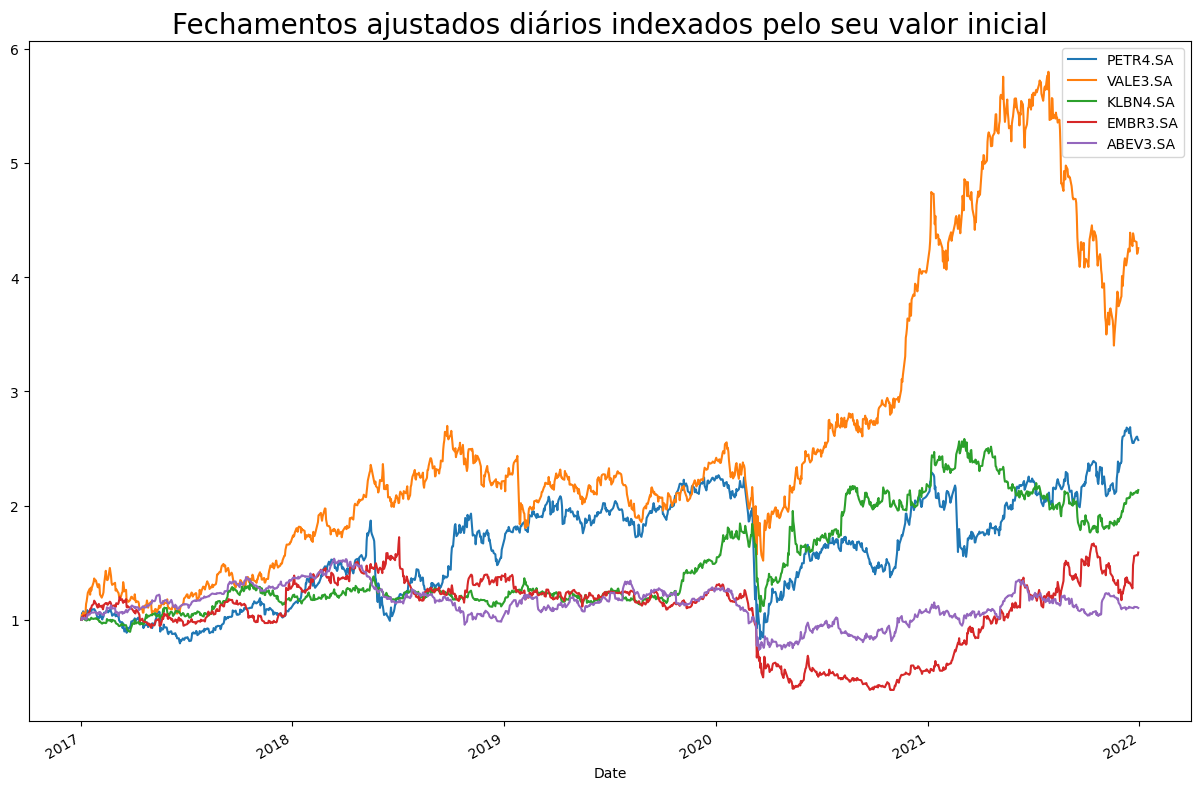

In [19]:
# Questão 2

    # Plotando os fechamentos ajustados desses ativos dividindo cada série pelo seu valor inicial 

for acao in acoes_escolhidas:
    cotacoes_adj_index = cotacoes_adj[f'{acao}']/cotacoes_adj[f'{acao}'].iloc[0]
    cotacoes_adj_index.plot(figsize=(15,10))
    plt.legend()
    plt.title('Fechamentos ajustados diários indexados pelo seu valor inicial', fontsize=20)

MM05


Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06    16.924690
                ...    
2021-12-23    70.864360
2021-12-27    70.825075
2021-12-28    70.605441
2021-12-29    70.053685
2021-12-30    69.703702
Name: VALE3.SA, Length: 1243, dtype: float64

MM20


Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
                ...    
2021-12-23    67.531937
2021-12-27    67.992182
2021-12-28    68.329219
2021-12-29    68.655096
2021-12-30    69.000168
Name: VALE3.SA, Length: 1243, dtype: float64

Text(0.5, 1.0, 'Preços de fechamento ajustado da Vale, e suas médias móveis de 5 e 20 dias úteis')

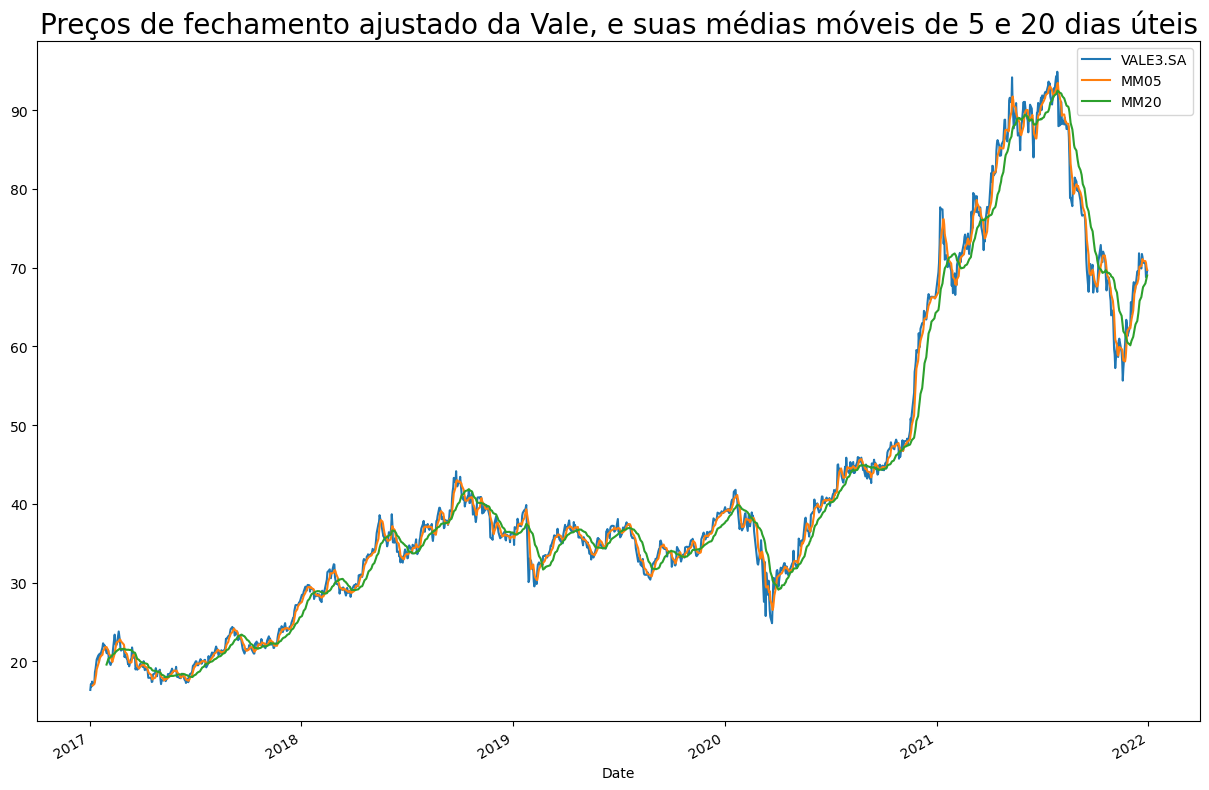

In [6]:
# Questão 3

    # construindo e plotando as médias móveis de 5 e 20 dias úteis para a VALE3

MM05 = cotacoes_adj['VALE3.SA'].rolling(5).mean() # MM de 5 dias
print('MM05')
display(MM05)

MM20 = cotacoes_adj['VALE3.SA'].rolling(20).mean() # MM de 20 dias
print('MM20')
display(MM20)

cotacoes_adj['VALE3.SA'].plot(figsize=(15,10)) # PLot
MM05.plot(label='MM05')
MM20.plot(label='MM20')
plt.legend()
plt.title('Preços de fechamento ajustado da Vale, e suas médias móveis de 5 e 20 dias úteis', fontsize=20)

Retorno simples das ações


,ABEV3.SA,EMBR3.SA,KLBN4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.020233,0.022500,0.025090,0.057299,0.044294
2017-01-04,-0.007812,-0.011614,-0.013986,0.000000,-0.017959
2017-01-05,0.005451,0.020408,0.014185,0.016129,0.038132
2017-01-06,-0.008434,0.004848,-0.013986,-0.005714,-0.026612
...,...,...,...,...,...
2021-12-23,0.010396,0.031780,-0.002024,0.006037,-0.009635
2021-12-27,-0.001286,0.003696,0.010142,0.014825,-0.002527
2021-12-28,-0.000644,0.002046,-0.008032,0.001043,-0.024066


Retorno logarítmo das ações


,ABEV3.SA,EMBR3.SA,KLBN4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.020031,0.022251,0.024780,0.055717,0.043341
2017-01-04,-0.007843,-0.011682,-0.014085,0.000000,-0.018123
2017-01-05,0.005436,0.020203,0.014085,0.016000,0.037423
2017-01-06,-0.008470,0.004837,-0.014085,-0.005731,-0.026972
...,...,...,...,...,...
2021-12-23,0.010343,0.031285,-0.002026,0.006019,-0.009681
2021-12-27,-0.001287,0.003689,0.010091,0.014716,-0.002530
2021-12-28,-0.000644,0.002044,-0.008065,0.001043,-0.024360


Retornos simples anualizados


ABEV3.SA    0.065278
EMBR3.SA    0.218774
KLBN4.SA    0.204054
PETR4.SA    0.309598
VALE3.SA    0.378465
dtype: float64

Retornos logarítmos anualizados


ABEV3.SA    0.020062
EMBR3.SA    0.094013
KLBN4.SA    0.153972
PETR4.SA    0.191810
VALE3.SA    0.293722
dtype: float64

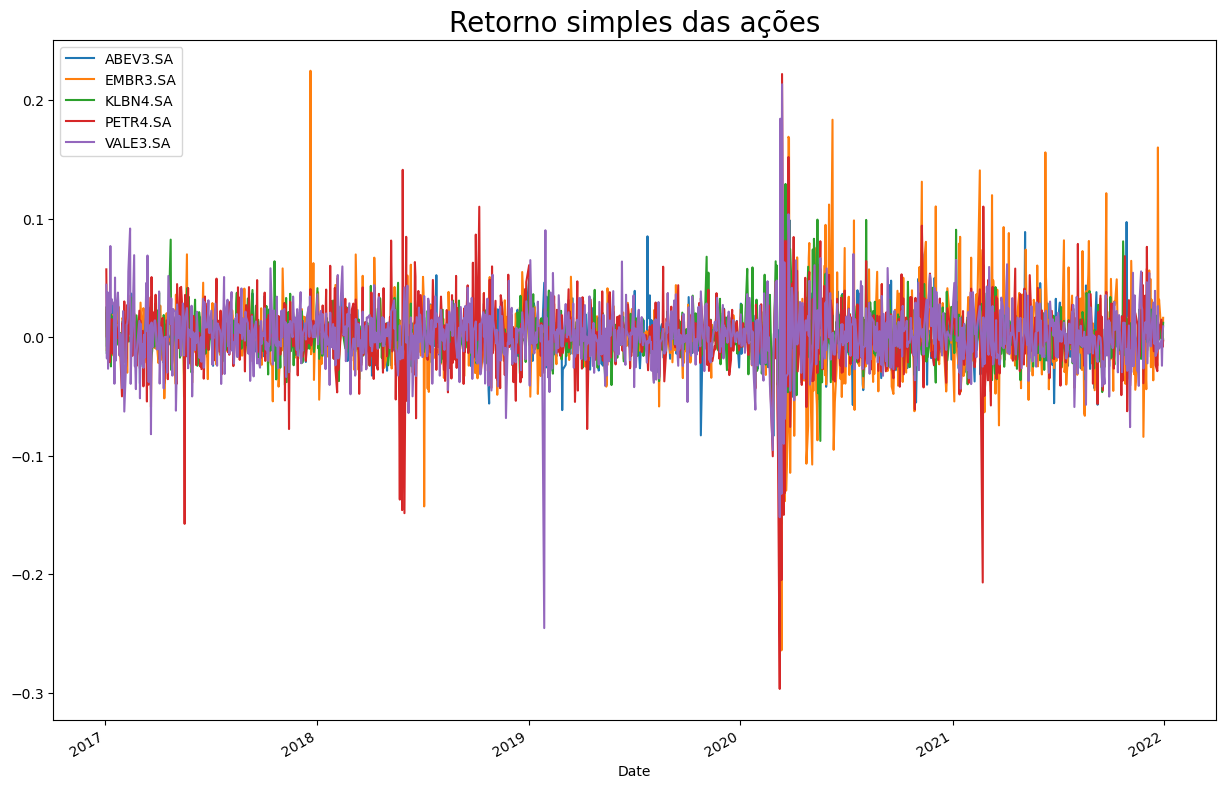

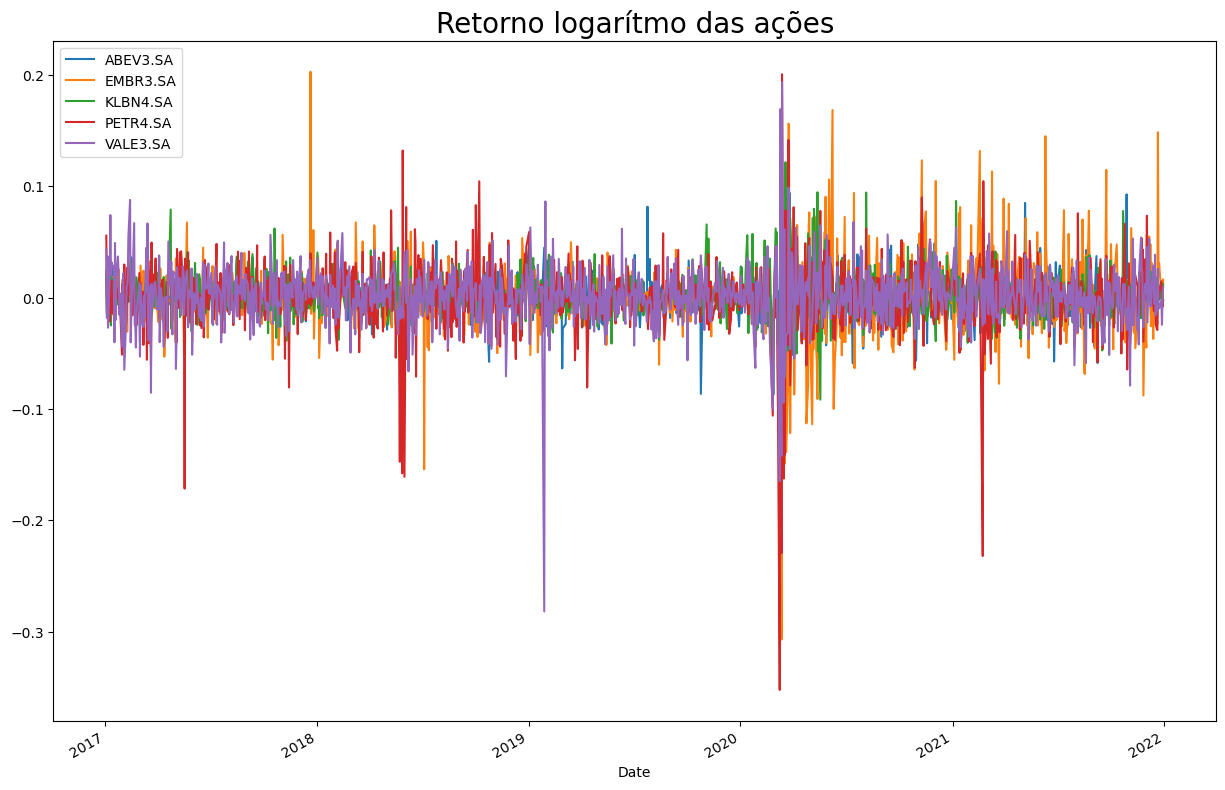

In [7]:
# Questão 4

    #Calculando o retorno simples e o retorno logarítmico 

import numpy as np

simpreturn = cotacoes_adj.pct_change() # Retorno simples
print('Retorno simples das ações')
display(simpreturn)
simpreturn.plot(figsize=(15,10)) # Plotando só de curiosidade
plt.title('Retorno simples das ações', fontsize=20)

logreturn = np.log(cotacoes_adj).diff() # Retorno logarítmo
print('Retorno logarítmo das ações')
display(logreturn)
logreturn.plot(figsize=(15,10)) # Plotando só de curiosidade
plt.title('Retorno logarítmo das ações', fontsize=20)

    # Transformando eles em retornos anualizados

simpreturn_anual = simpreturn.mean()*252 
print('Retornos simples anualizados')
display(simpreturn_anual)


logreturn_anual = logreturn.mean()*252
print('Retornos logarítmos anualizados')
display(logreturn_anual)

    # Podemos ver que os retornos simples e logarítmos não são iguais, porém, a grandeza de retorno entre os ativos não mudou.
    # Por exemplo, a ação da Vale foi a que teve maior retorno(tanto usando o simples quanto o logaritmo).

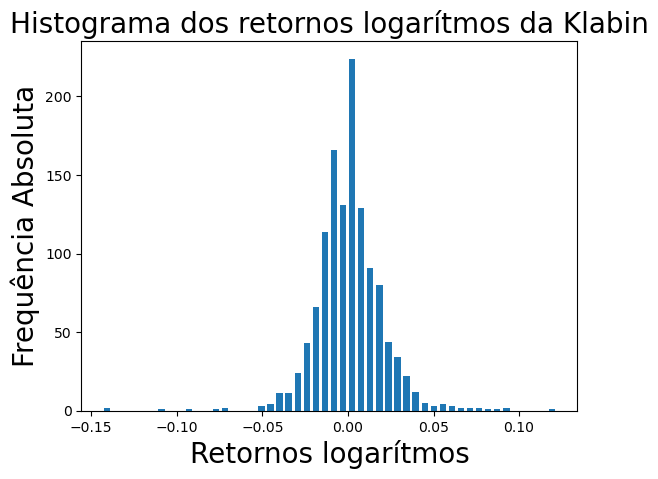

In [8]:
# Questão 5

    # Plotando o histograma de retornos logarítmos da ação da Klabin

plt.title('Histograma dos retornos logarítmos da Klabin', fontsize=20)
plt.xlabel('Retornos logarítmos', fontsize=20)
plt.ylabel('Frequência Absoluta', fontsize=20)
plt.hist(logreturn['KLBN4.SA'], 50, rwidth=0.7) 
plt.rcParams['figure.figsize'] = [10, 10] 
plt.show()

In [9]:
# Questão 6

    # Encontre a média e o desvio padrão anualizada dos log retornos de todos os ativos.

logreturn_mean_anual = logreturn.mean()*252
print('Médias dos log retornos anualizadas')
display(logreturn_mean_anual)

logreturn_std_anual = logreturn.std()*(252)**(1/2)
print('Desvios padrão dos log retornos anualizados')
display(logreturn_std_anual)

    # Comparando a performance das ações usando como base o Índice de Sharpe
    # (considerando a taxa SELIC atual de 0.1375 como a taxa livre de risco)

sharp_ratio = (logreturn_mean_anual - 0.1375)/logreturn_std_anual
print('Índice de Sharpe de cada ativo')
display(sharp_ratio)

    # Usando como base o Índice de Sharpe, temos que a Vale foi a que performou melhor, pois foi a que apresentou 
    # o maior retorno excessivo(retorno do ativo - taxa livree de risco) para uma unidade de volatilidade.

Médias dos log retornos anualizadas


ABEV3.SA    0.020062
EMBR3.SA    0.094013
KLBN4.SA    0.153972
PETR4.SA    0.191810
VALE3.SA    0.293722
dtype: float64

Desvios padrão dos log retornos anualizados


ABEV3.SA    0.301338
EMBR3.SA    0.499781
KLBN4.SA    0.316424
PETR4.SA    0.489990
VALE3.SA    0.412472
dtype: float64

Índice de Sharpe de cada ativo


ABEV3.SA   -0.389722
EMBR3.SA   -0.087013
KLBN4.SA    0.052056
PETR4.SA    0.110839
VALE3.SA    0.378746
dtype: float64

In [10]:
# Questão 7

    # Escolhendo um peso para cada ativo(PETR4.SA = 20%, VALE3.SA = 60%, KLBN4.SA = 10%, EMBR3.SA = 7%, ABEV3.SA = 3%)
    
portfolio = 0.2*simpreturn['PETR4.SA'] + 0.6*simpreturn['VALE3.SA'] + 0.1*simpreturn['KLBN4.SA'] + 0.07*simpreturn['EMBR3.SA'] + 0.03*simpreturn['ABEV3.SA']
print('Retorno do portfolio')
display(portfolio)

    # Calculando estatisticas descritivas

portfolio.describe()

Retorno do portfolio


Date
2017-01-02         NaN
2017-01-03    0.042727
2017-01-04   -0.013222
2017-01-05    0.029116
2017-01-06   -0.018422
                ...   
2021-12-23   -0.002239
2021-12-27    0.002683
2021-12-28   -0.014910
2021-12-29   -0.000446
2021-12-30    0.007187
Length: 1243, dtype: float64

count    1242.000000
mean        0.001296
std         0.020943
min        -0.163223
25%        -0.009194
50%         0.001199
75%         0.012390
max         0.185859
dtype: float64

,ABEV3.SA,EMBR3.SA,KLBN4.SA,PETR4.SA,VALE3.SA,Portfolio
Date,,,,,,
2017-01-03,13.537618,15.967448,2.173134,6.830192,17.090565,0.042727
2017-01-04,13.431856,15.782005,2.142740,6.830192,16.783630,0.028940
2017-01-05,13.505075,16.104090,2.173134,6.940355,17.423628,0.058899
2017-01-06,13.391177,16.182167,2.142740,6.900697,16.959955,0.039392
2017-01-09,13.448129,16.221207,2.112347,6.755280,17.306078,0.046572
...,...,...,...,...,...,...
2021-12-23,14.771684,24.350000,4.464475,16.556160,70.666153,2.820375
2021-12-27,14.752684,24.440001,4.509754,16.801609,70.487587,2.830626
2021-12-28,14.743185,24.490000,4.473531,16.819141,68.791245,2.773511


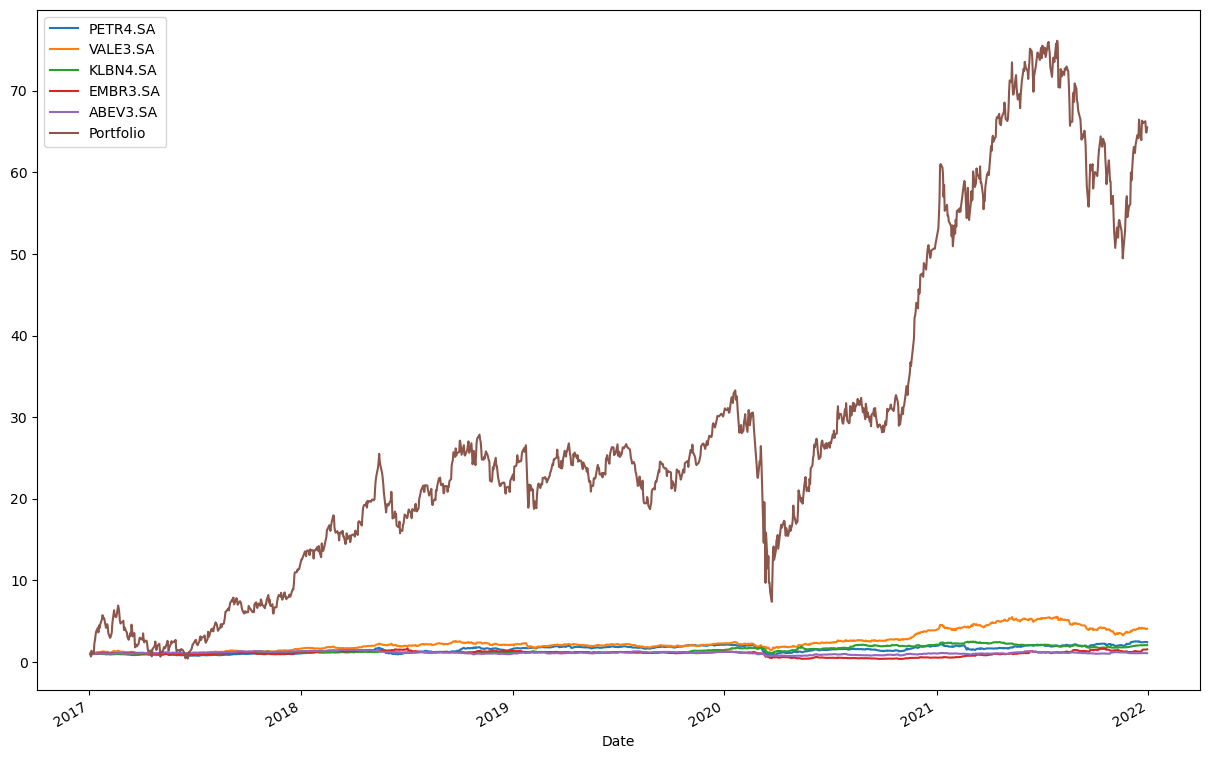

In [32]:
# Questão 8

    # Transformando a série de retorno do portfólio em uma serie de retornos acumulados


port_acumulado_um = np.cumprod(1 + portfolio)
port_acumulado = port_acumulado_um - 1

df = cotacoes_adj.assign(Portfolio = port_acumulado) # Adicionando o portfolio na base
df = df.drop('2017-01-02')
display(df)

    # PLotando em um mesmo gráfico, com as variaveis começando com 1

variables = ['PETR4.SA', 'VALE3.SA', 'KLBN4.SA', 'EMBR3.SA', 'ABEV3.SA', 'Portfolio']

for var in variables:
    df_index = df[f'{var}']/df[f'{var}'].iloc[0]
    df_index.plot(figsize=(15,10))
    plt.legend()    